In [15]:
# importing libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df = pd.read_excel("Retail2.xlsx")
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [2]:
#%% Importing dataset and grouping by date so we can get the number of homicides per month and so we create the time series that will be analysed 
data = pd.read_csv('databaseF1.csv')
names=['Record','Date']
data = data[names]
data['Date'] = pd.to_datetime(data['Date'])
ts = data.groupby(['Date'])['Record'].count()
#ts.rename(columns ={'Record ID':'Records'}, inplace = True) 
ts

Date
1980-01-01    1825
1980-02-01    1730
1980-03-01    1743
1980-04-01    1760
1980-05-01    1863
              ... 
2014-08-01    1292
2014-09-01    1182
2014-10-01    1265
2014-11-01    1178
2014-12-01    1309
Name: Record, Length: 420, dtype: int64

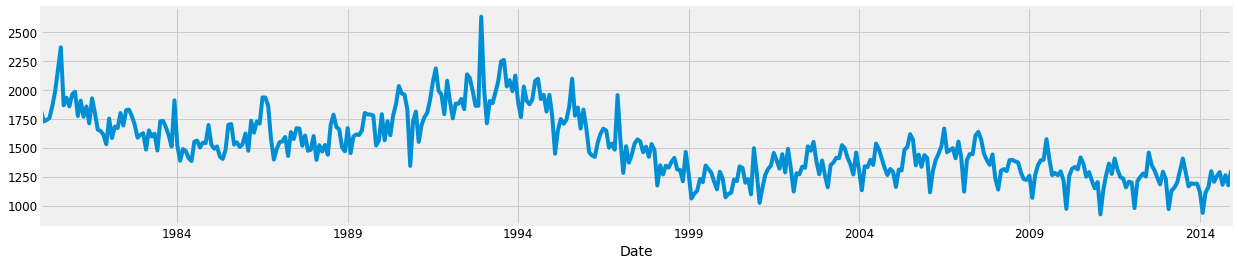

In [3]:
#plotting data
ts.plot(figsize=(19, 4))
plt.show()

In [4]:
ts.tail(25)

Date
2012-12-01    1296
2013-01-01    1232
2013-02-01     972
2013-03-01    1131
2013-04-01    1157
2013-05-01    1201
2013-06-01    1303
2013-07-01    1410
2013-08-01    1292
2013-09-01    1169
2013-10-01    1195
2013-11-01    1190
2013-12-01    1193
2014-01-01    1122
2014-02-01     939
2014-03-01    1116
2014-04-01    1162
2014-05-01    1300
2014-06-01    1208
2014-07-01    1258
2014-08-01    1292
2014-09-01    1182
2014-10-01    1265
2014-11-01    1178
2014-12-01    1309
Name: Record, dtype: int64

In [5]:
#Intialize SARIMAX parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
#Fitting the model of Arima
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7343.831162794484
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6622.807448612819
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5168.782991459375
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4980.340710277526


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5166.873157301252
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5155.137836583338
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4995.114698075993


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4982.315877854584
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6811.754644031257


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6183.896872447801
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5041.134448635782


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4850.317669842732


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5054.128184207009


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5021.56567011516
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4875.7744295959765


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4852.289426765942
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5364.9531806570385
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5080.470312043453
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5067.682339498066


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4771.783196650909
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4997.817325106574


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4932.208794934234
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4848.725103958815


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4761.474626266136
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5289.7334643191125


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4989.748985001339
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4965.932988993189


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:4673.461034193644
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:4911.7986567372245


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4834.42782009698
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4759.185609787245


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:4669.225516028857
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:5377.867878352961


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5094.572401410936
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4990.434507150094


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4754.548511865483
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4980.363333574165


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4912.566825437525
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4783.882823233151


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4745.472500615191
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5303.204353869315


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5003.564164545221
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4958.096436982018


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4682.032352609469
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4912.2401306829215


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4843.903849678896


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4751.391100912398


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4672.984870262082
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5328.836267811299
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:5041.322295715077
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5021.0537139816415


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4730.676927114651
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4939.545661146176


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4886.094530197037
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4796.203247178621


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4721.909995510455
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5259.127064321658


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4962.951994920486
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4955.840585810983


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4666.354952018532
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4881.005038194967


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4826.762620765605


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4736.785219768224


/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:4661.900300221187


In [7]:
# Apply SARIMA
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/kt-internee-01/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4930      0.041     11.996      0.000       0.412       0.574
ar.S.L12      -0.0131      0.270     -0.049      0.961      -0.543       0.517
ma.S.L12      -0.1218      0.263     -0.463      0.643      -0.637       0.394
sigma2       1.28e+04    700.525     18.275      0.000    1.14e+04    1.42e+04


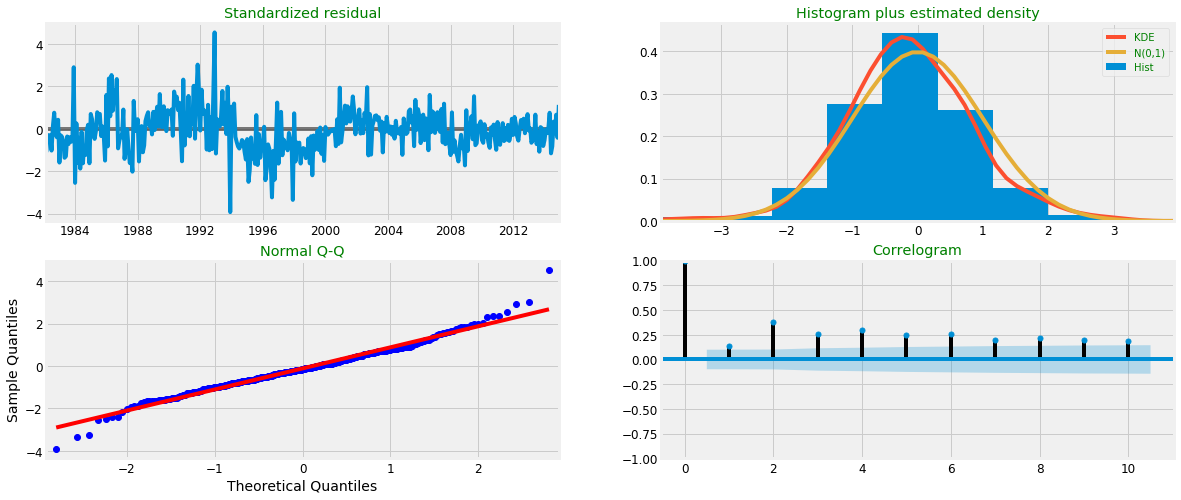

In [8]:
# Diagnostic Plots
results.plot_diagnostics(figsize=(18, 8))
plt.show()

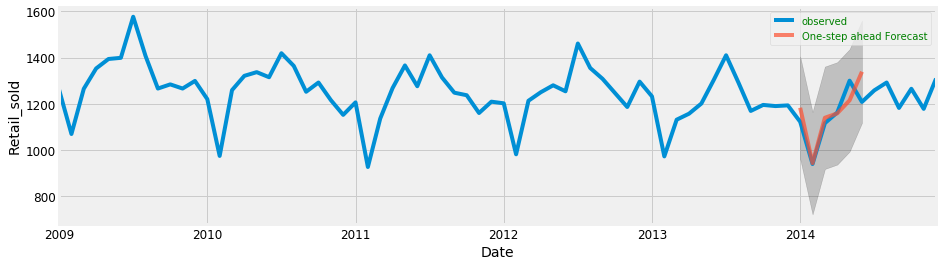

In [9]:
# chcking prediction on test data, say after 2014-06-01 and plotting graph
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), end=pd.to_datetime('2014-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [10]:
# Measuring accuracy
y_forecasted = pred.predicted_mean
y_truth = ts['2014-01-01':'2014-06-01']
mse = mean_squared_error(y_truth , y_forecasted)
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 4776.74
The Root Mean Squared Error is 69.11


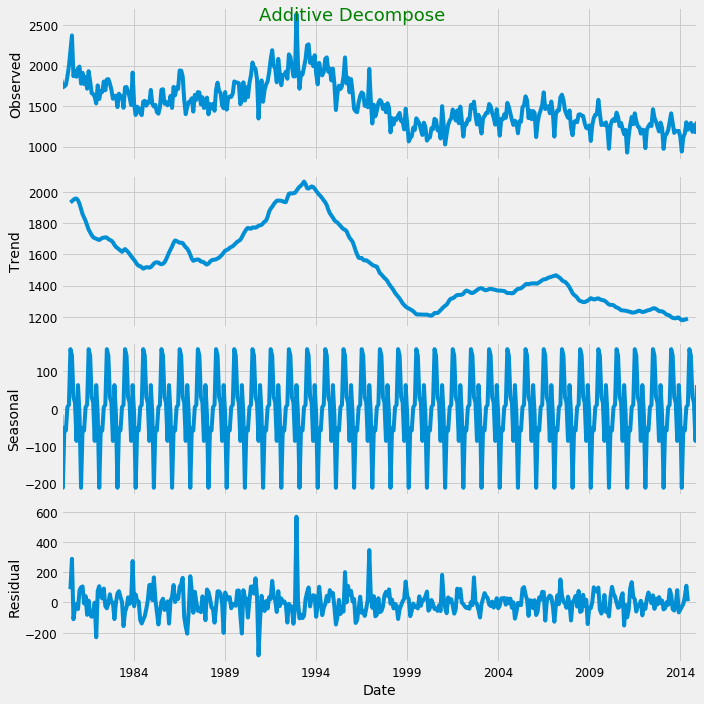

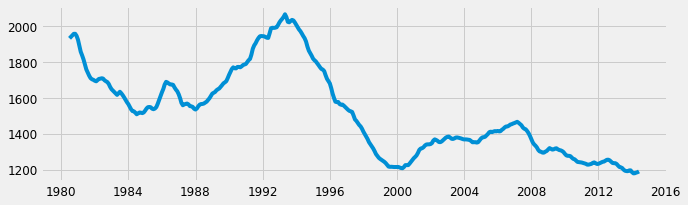

In [13]:
result_add = seasonal_decompose(ts, model='additive')
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()
trend = df_reconstructed['trend'] 
trend.dropna(inplace = True)
seas = df_reconstructed['seas']
seas.dropna(inplace = True)
plt.rcParams.update({'figure.figsize': (10,3)})
plt.plot(trend)

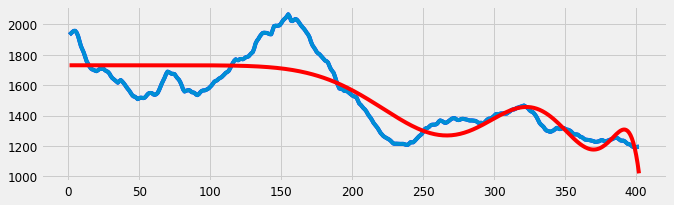

In [16]:
from sklearn.preprocessing import PolynomialFeatures


X = np.linspace(1, len(trend), len(trend)) 
y = trend
X_test_true = X[-6:]
y_test_true = y[-6:]
X = X[:-6]
y = y[:-6]
plt.figure()
plt.plot(X, y, color = 'blue')
X = np.reshape(X, (len(trend)-6, 1))
y = y.values.reshape(len(trend)-6,1)

poly = PolynomialFeatures(degree = 15) 
poly.fit(X)
X_poly = poly.transform(X)
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
plt.plot(X, y)
lin2.fit(X_poly, y) 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')

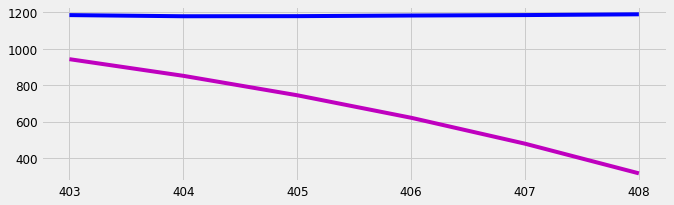

In [17]:
plt.figure()
plt.plot(X_test_true, y_test_true, color = 'blue')
X = np.reshape(X_test_true, (6, 1))
y = y_test_true.values.reshape(6,1)
X_poly = poly.transform(X)
focasted = lin2.predict(X_poly)
plt.plot(X, focasted, color = 'm')

In [23]:
print(seas[-12:-6])
sea = seas[-12:-6].values.reshape(6,1)

Date
2014-01-01    -16.268893
2014-02-01   -212.464971
2014-03-01    -52.888991
2014-04-01    -58.637766
2014-05-01      4.255617
2014-06-01     10.014195
Name: seas, dtype: float64


In [24]:
mse = mean_squared_error(y+sea , focasted+sea)
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 322234.47
The Root Mean Squared Error is 567.66


### Conclusion
As the RMSE of regression is higher than SARIMA so we are picking the SARIMA for future forcasting 

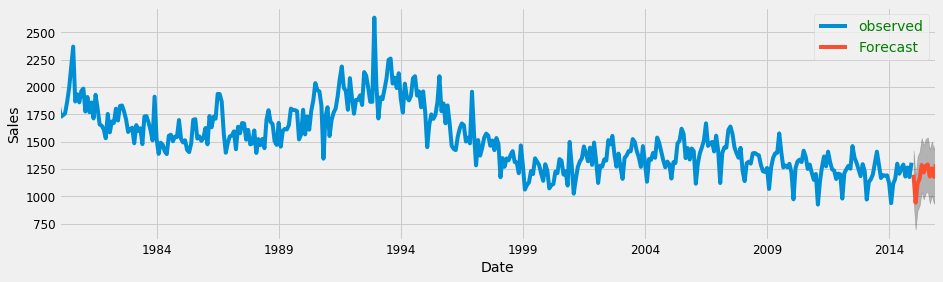

In [204]:
# predicting and plotting next 12 months
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [205]:
y_forecasted = pred.predicted_mean
y_forecasted

2014-01-01    1182.841681
2014-02-01     942.434814
2014-03-01    1139.352706
2014-04-01    1158.441502
2014-05-01    1214.778534
2014-06-01    1338.867229
Freq: MS, dtype: float64

In [206]:
y_truth.head(12)

Date
2014-01-01    1122
2014-02-01     939
2014-03-01    1116
2014-04-01    1162
2014-05-01    1300
2014-06-01    1208
Name: Record, dtype: int64

In [207]:
pred_ci.head(24)

,lower Record,upper Record
2015-01-01,977.345155,1420.868744
2015-02-01,696.254290,1190.754627
2015-03-01,871.996881,1366.497218
2015-04-01,915.653046,1410.153383
2015-05-01,1040.858562,1535.358899
2015-06-01,972.816877,1467.317214
2015-07-01,1031.997624,1526.497961
2015-08-01,1045.716306,1540.216643
2015-09-01,935.161519,1429.661856
2015-10-01,1009.154017,1503.654354


In [208]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2015-01-01    1199.106950
2015-02-01     943.504458
2015-03-01    1119.247050
2015-04-01    1162.903215
2015-05-01    1288.108731
2015-06-01    1220.067046
2015-07-01    1279.247793
2015-08-01    1292.966475
2015-09-01    1182.411688
2015-10-01    1256.404186
2015-11-01    1179.516183
2015-12-01    1294.859451
Freq: MS, dtype: float64

In [209]:
forecast.to_frame() 

,0
2015-01-01,1199.106950
2015-02-01,943.504458
2015-03-01,1119.247050
2015-04-01,1162.903215
2015-05-01,1288.108731
2015-06-01,1220.067046
2015-07-01,1279.247793
2015-08-01,1292.966475
2015-09-01,1182.411688
2015-10-01,1256.404186


In [210]:
# save in file
forecast.to_csv('predicted_next_12_months.csv')